In [1]:
import pandas as pd

In [2]:

import MetaTrader5 as mt5

if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [3]:
mt5.initialize()

True

In [4]:
mt5.terminal_info()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3500, maxbars=100000, codepage=1252, ping_last=205139, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\Gracinha\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\Gracinha\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3500, maxbars=100000, codepage=1252, ping_last=208208, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\Gracinha\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\Gracinha\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 3500, '11 Nov 2022')
euraud_ticks( 1000 )
(1580227200, 1.62918, 1.62945, 0., 0, 1580227200016, 134, 0.)
(1580227200, 1.62918, 1.62948, 0., 0, 1580227200228, 4, 0.)
(1580227200, 1.62918, 1.62947, 0., 0, 1580227200418, 4, 0.)
(1580227200, 1.62918, 1.62946, 0., 0, 1580227200627, 4, 0.)
(1580227200, 1.62918, 1.62948, 0., 0, 1580227200843, 

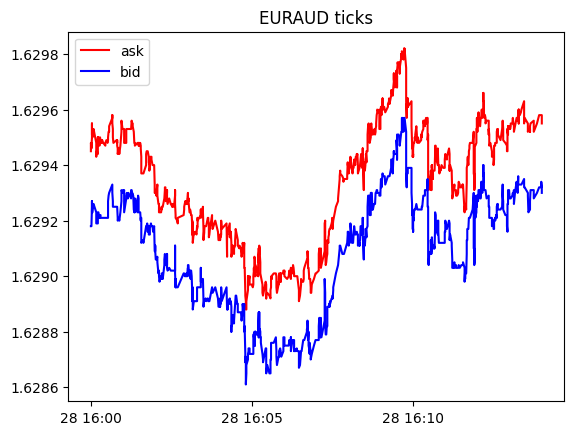

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
 
# connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
 
# request connection status and parameters
print(mt5.terminal_info())
# get data on MetaTrader 5 version
print(mt5.version())
 
# request 1000 ticks from EURAUD
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
# request ticks from AUDUSD within 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("AUDUSD", datetime(2020,1,27,13), datetime(2020,1,28,13), mt5.COPY_TICKS_ALL)
 
# get bars from different symbols in a number of ways
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
 
# shut down connection to MetaTrader 5
mt5.shutdown()
 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 
print('eurusd_rates(', len(eurusd_rates), ')')
for val in eurusd_rates[:10]: print(val)
 
print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)
 
print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)
 
#PLOT
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(euraud_ticks)
# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
# display ticks on the chart
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# display the legends
plt.legend(loc='upper left')
 
# add the header
plt.title('EURAUD ticks')
 
# display the chart
plt.show()

In [6]:
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2020,1,28,13), 9999, mt5.COPY_TICKS_ALL)
pd.DataFrame(euraud_ticks)

""


In [7]:
mt5.initialize()
#data = mt5.copy_rates_from("PETR4", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
data = mt5.copy_ticks_from("PETR4", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
pd.DataFrame(data)

""
